In [1]:
import networkx as nx 
import numpy as np
import pandas as pd

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [329]:
gpa = pd.read_excel('gpa_all.xlsx')

In [330]:
nod = pd.read_excel('nod_all.xlsx')

In [331]:
graph = pd.read_excel('second_answers.xlsx')

In [335]:
surnames_main = graph['name']

In [336]:
def show_graph_with_labels(adjacency_matrix, labels_all, wide, type_form):
    rows, cols = np.where(adjacency_matrix == 1) #вытаскиваем строчки и колонны с 1
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.DiGraph()
    all_rows = range(0, adjacency_matrix.shape[0])
    for n in all_rows:
        gr.add_node(n) #добавляем вершины
    gr.add_edges_from(edges) #добавляем линии

    plt.figure(figsize =(18,10))
    nx.draw(gr, labels=labels_all, with_labels=True, node_color=wide, cmap='OrRd', linewidths=0.3, width=0.3,
            pos = nx.kamada_kawai_layout(gr)) #вот здесь можно разный layout задавать, 
    #по окружности circular_layout, или по окрудностям- каждая группа это окружность shell_layout, рондомно random_layout,
    #или как у меня по центральности kamada_kawai_layout
    plt.title('{} social network'.format(type_form), fontsize=20)
    plt.show()

In [337]:
def graph_group(GRAPH, class_name, type_form):
    names = list(GRAPH['name'])
    surnames = []
    for nam in names:
        surnames.append(nam)
    
    for i in range(len(GRAPH)):
        student = GRAPH.iloc[i]
        for peer in list(student[class_name].split(', ')):
            if peer not in surnames:
                surnames.append(peer)
            
    surnames = list(sorted(set(surnames)))
    
        
    cheat = []
    for student in surnames:
        for i in range(len(nod)):
            name = nod.iloc[i]
            if name['name'] == student:
                cheat.append(name['d1fraud'])
                
    cheat_all = []
    for k in cheat:
        cheat_all.append(str(k))
     
    labels = {}
    for i in range(len(surnames)):
        labels[i] = cheat_all[i]
    
    data = pd.DataFrame(np.zeros((len(surnames), len(surnames))), columns = surnames, index=surnames)
    
    for i in range(len(GRAPH)):
        stu = GRAPH.iloc[i]
        for stu2 in list(stu[class_name].split(', ')):
            stu2 = stu2
            if data[stu2][stu['name']] != 1:
                data[stu2][stu['name']] = 1
    
    show_graph_with_labels(data, labels, cheat, type_form)

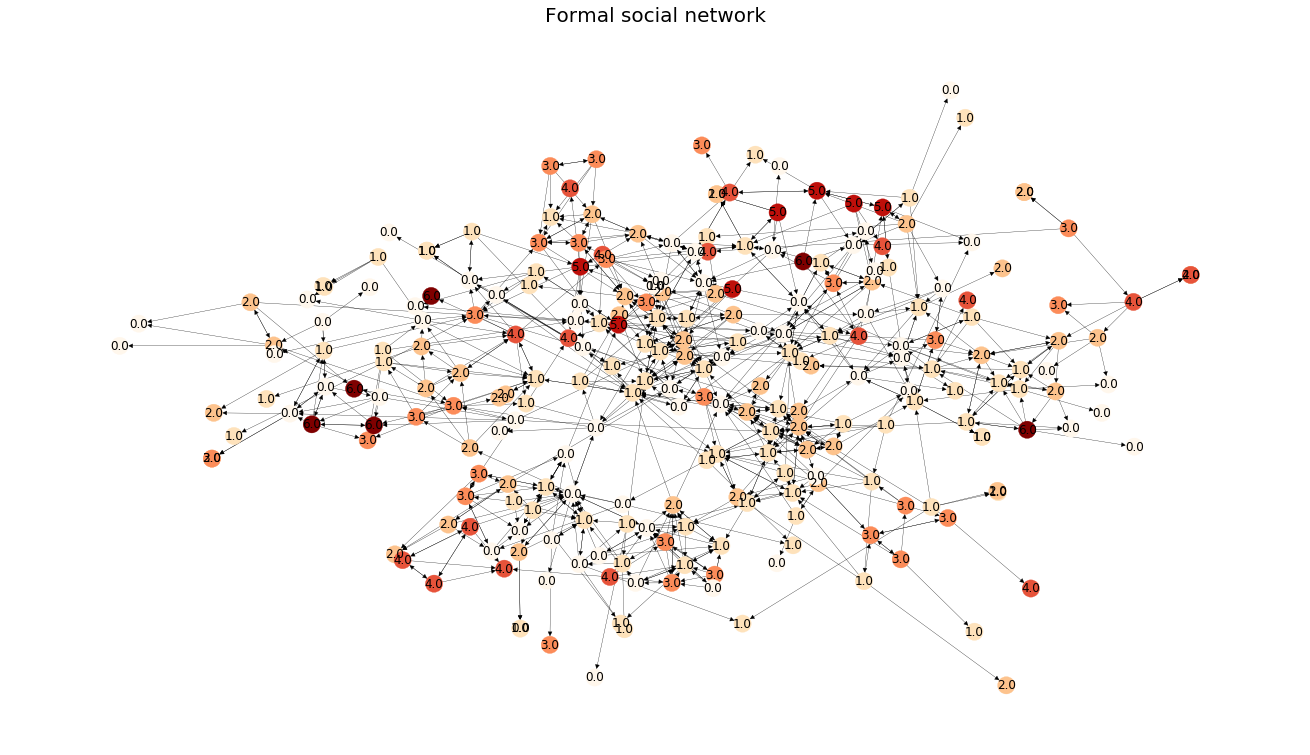

In [338]:
graph_group(graph, 'classmates', 'Formal')

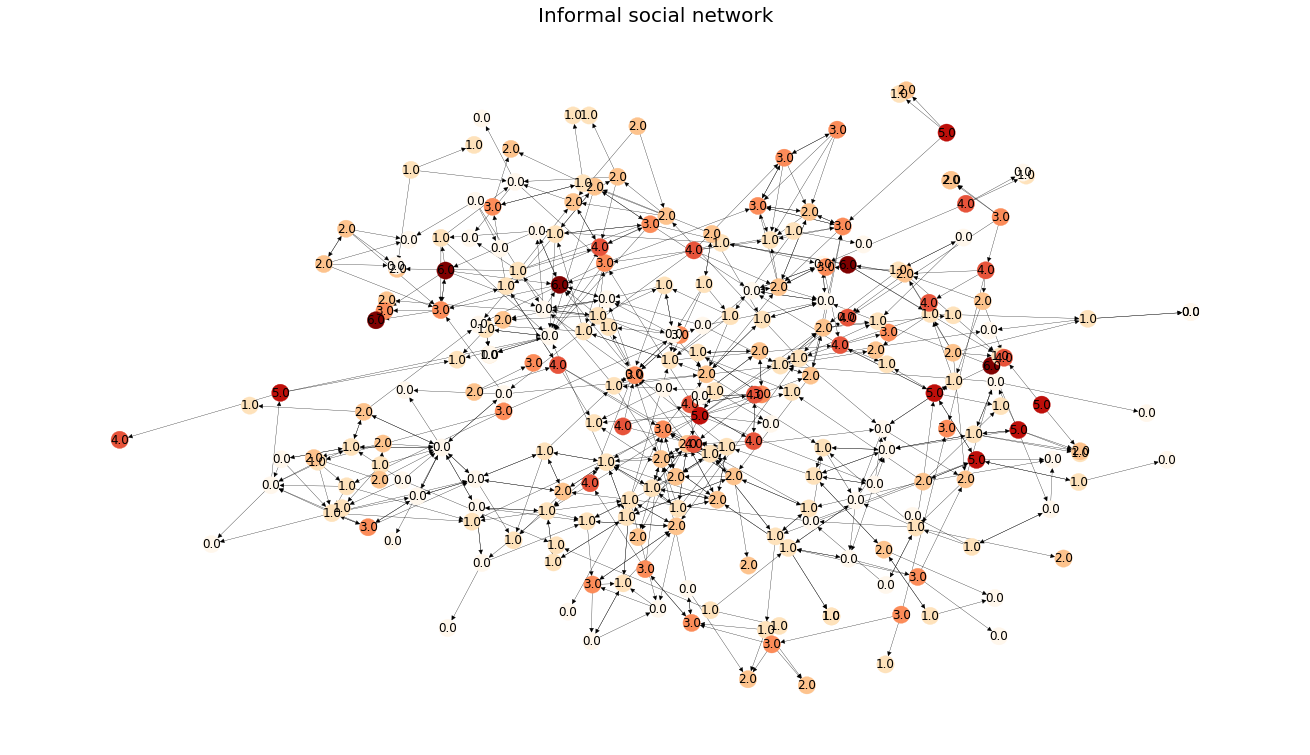

In [339]:
graph_group(graph, 'friends', 'Informal')

# Замена ФИО на ФИ

In [31]:
table = pd.read_excel('nod_all.xlsx')

In [33]:
list_stu = []
for i in range(len(table)):
    stu = table.iloc[i]['fio']
    if len(stu.split()) >= 3:
        list_stu.append(stu.split()[0] + ' ' + stu.split()[1])
    else:
        list_stu.append(stu)

In [34]:
table['name'] = list_stu

In [37]:
table.to_excel('nod_all.xlsx')

# Считывание опроса и создание матрицы смежности

In [275]:
table = pd.read_excel('second_answers.xlsx')

In [276]:
names = list(table['name'])
group_list = []
surnames_main = []
surnames_tie1 = []
surnames_tie2 = []
for nam in names:
    surnames_main.append(nam)
    
for i in range(len(table)):
    student = table.iloc[i]
    for peer in list(student['classmates'].split(', ')):
        if peer not in surnames_tie1:
            surnames_tie1.append(peer)
    for peer in list(student['friends'].split(', ')):
        if peer not in surnames_tie2:
            surnames_tie2.append(peer)
    group_list.append(student['group'])
        
            
surnames_tie1 = list(sorted(set(surnames_tie1)))
surnames_tie2 = list(sorted(set(surnames_tie2)))
    
data1 = pd.DataFrame(np.zeros((len(surnames_main), len(surnames_tie1))), columns = surnames_tie1, index=surnames_main)
data2 = pd.DataFrame(np.zeros((len(surnames_main), len(surnames_tie2))), columns = surnames_tie2, index=surnames_main)

In [278]:
for i in range(len(table)):
    stu = table.iloc[i]
    for stu2 in list(stu['classmates'].split(', ')):
        data1[str(stu2)][str(stu['name'])] = 1
    for stu1 in list(stu['friends'].split(', ')):
        data2[str(stu1)][str(stu['name'])] = 1

In [279]:
for j in range(len(data1)):
    st = data1.iloc[j]
    a = np.array(st).sum()
    data1.iloc[j] = st/a

In [280]:
for j in range(len(data2)):
    st = data2.iloc[j]
    a = np.array(st).sum()
    data2.iloc[j] = st/a

# Работа с вытаскиванием нужных gpa и списываний

In [281]:
gpa = pd.read_excel('gpa_all.xlsx')

In [282]:
nod = pd.read_excel('nod_all.xlsx')

In [283]:
#main.to_excel('main_answer.xlsx')

In [284]:
gpa_all = []
for student in surnames_tie1:
    for i in range(len(gpa)):
        name = gpa.iloc[i]
        if name['name'] == student:
            gpa_all.append(name['GPA'])            

In [285]:
cheat = []
for student in surnames_tie1:
    for i in range(len(nod)):
        name = nod.iloc[i]
        if name['name'] == student:
            cheat.append(name['d1fraud'])  

In [286]:
main1 = pd.DataFrame(surnames_tie1, columns = ['name'])

In [287]:
main1['gpa'] = gpa_all
main1['cheat'] = cheat

In [288]:
M1 = np.dot(np.array(data1), np.array(main1['cheat']))

In [289]:
gpa_all = []
for student in surnames_tie2:
    for i in range(len(gpa)):
        name = gpa.iloc[i]
        if name['name'] == student:
            gpa_all.append(name['GPA'])  

In [290]:
cheat = []
for student in surnames_tie2:
    for i in range(len(nod)):
        name = nod.iloc[i]
        if name['name'] == student:
            cheat.append(name['d1fraud'])  

In [291]:
main2 = pd.DataFrame(surnames_tie2, columns = ['name'])

In [292]:
main2['gpa'] = gpa_all
main2['cheat'] = cheat

In [293]:
M2 = np.dot(np.array(data2), np.array(main2['cheat']))

In [294]:
len(main1) #количество людей в первом вопросе

237

In [295]:
len(main2) #количество людей во втором вопросе

223

In [296]:
#дальше код для проверки, кого мог забыть 

In [297]:
gpa_names = np.array(gpa['name'])
nod_names = np.array(nod['name'])

In [298]:
for name in surnames_tie2:
    if name not in nod_names:
        print(name)

In [299]:
for name in surnames_tie2:
    if name not in gpa_names:
        print(name)

In [300]:
#проверка размерности

In [301]:
M1.shape

(163,)

In [302]:
M2.shape

(163,)

In [303]:
gpas = []
cheats = []
groups = []
for name in names:
    for i in range(len(gpa)):
        student = gpa.iloc[i]
        if student['name'] == name:
            gpas.append(student['GPA'])
        student = nod.iloc[i]
        if student['name'] == name:
            cheats.append(student['d1fraud'])
            groups.append(student['group'])

In [262]:
len(gpas)

162

In [266]:
len(groups)

163

In [263]:
len(cheats)

163

In [304]:
main = pd.DataFrame(names, columns = ['name'])

In [305]:
main['group'] = groups
main['gpa'] = gpas
main['cheat'] = cheats

In [471]:
main = pd.read_excel('main_answer.xlsx')

In [307]:
main['sex'] = table['sex']

In [308]:
main['cheat_formal'] = M1

In [309]:
main['cheat_informal'] = M2

In [310]:
mur1 = np.dot(np.array(data1), np.array(main1['gpa']))

In [311]:
main['gpa_formal'] = mur1

In [312]:
mur2 = np.dot(np.array(data2), np.array(main2['gpa']))

In [313]:
main['gpa_informal'] = mur2

In [ ]:
main = pd.read_csv('main_table_second.csv')

# А теперь посмотрим что же получилось

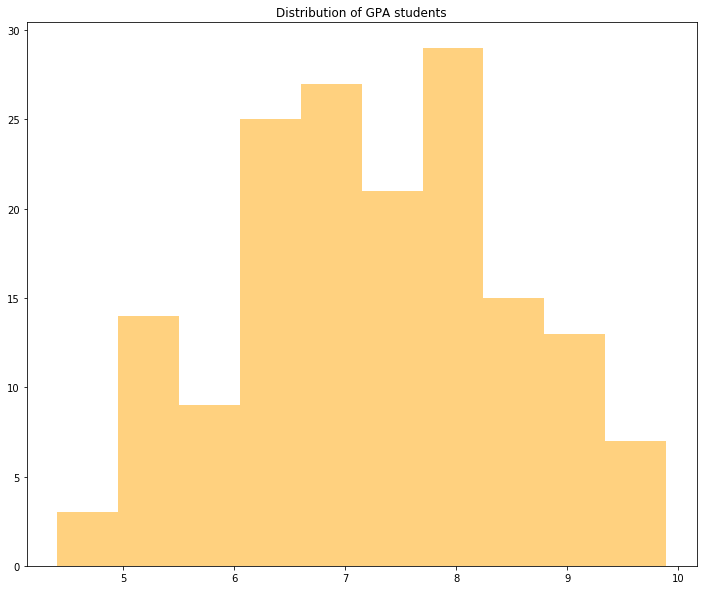

In [317]:
plt.figure(figsize=(12,10))
plt.hist(main['gpa'], bins=10, alpha=0.5, color = 'orange') #ну похоже на нормальное, может только чуть-чуть смещено к 8, но не сильно
plt.title('Distribution of GPA students');

(array([ 3.,  1.,  0.,  2.,  7.,  2.,  3.,  9., 15., 12., 11., 13., 16.,
        17., 13., 13.,  5., 10.,  7.,  4.]),
 array([5.26    , 5.454125, 5.64825 , 5.842375, 6.0365  , 6.230625,
        6.42475 , 6.618875, 6.813   , 7.007125, 7.20125 , 7.395375,
        7.5895  , 7.783625, 7.97775 , 8.171875, 8.366   , 8.560125,
        8.75425 , 8.948375, 9.1425  ]),
 <a list of 20 Patch objects>)

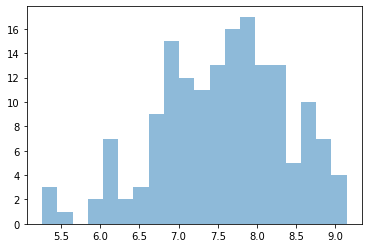

In [318]:
plt.hist(main['gpa_formal'], bins=20, alpha=0.5, label = 'gpa_informal')

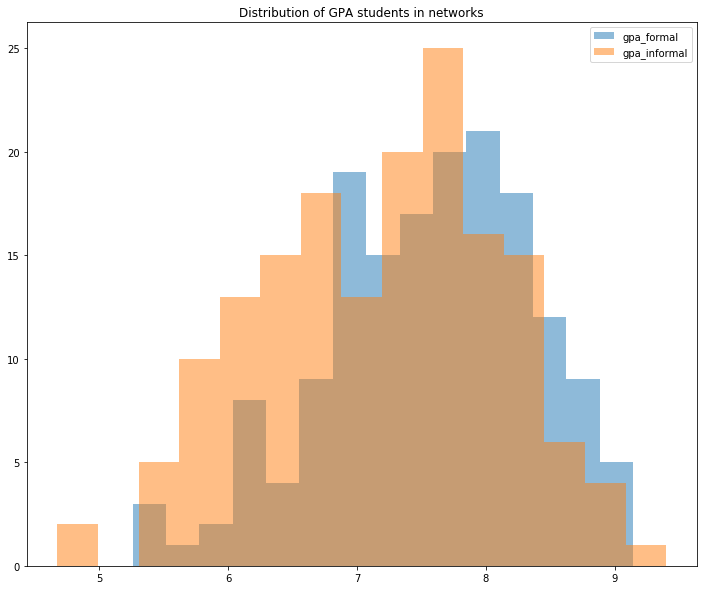

In [319]:
plt.figure(figsize=(12,10))
plt.hist(main['gpa_formal'], bins=15, alpha=0.5, label = 'gpa_formal')
plt.hist(main['gpa_informal'], bins=15, alpha=0.5, label = 'gpa_informal')
plt.legend()
plt.title('Distribution of GPA students in networks');

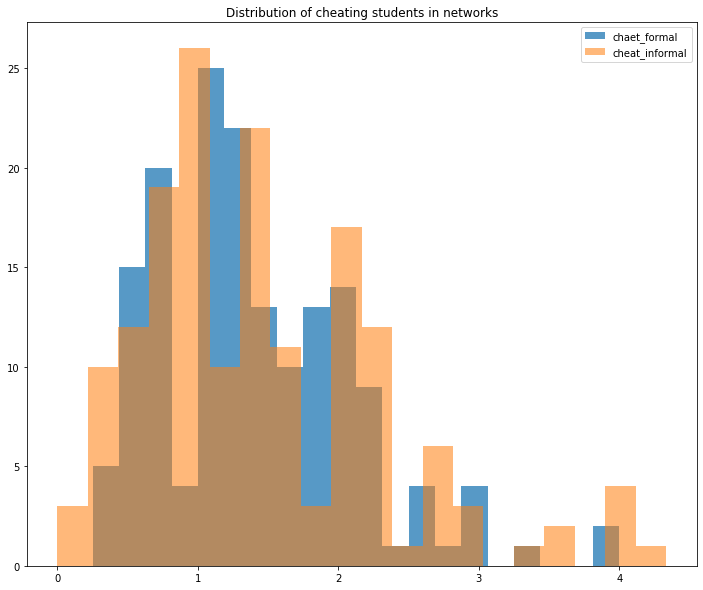

In [320]:
plt.figure(figsize=(12,10))
plt.hist(main['cheat_formal'], bins=20, alpha=0.75, label = 'chaet_formal')
plt.hist(main['cheat_informal'], bins=20, alpha=0.55, label = 'cheat_informal')
plt.legend()
plt.title('Distribution of cheating students in networks');

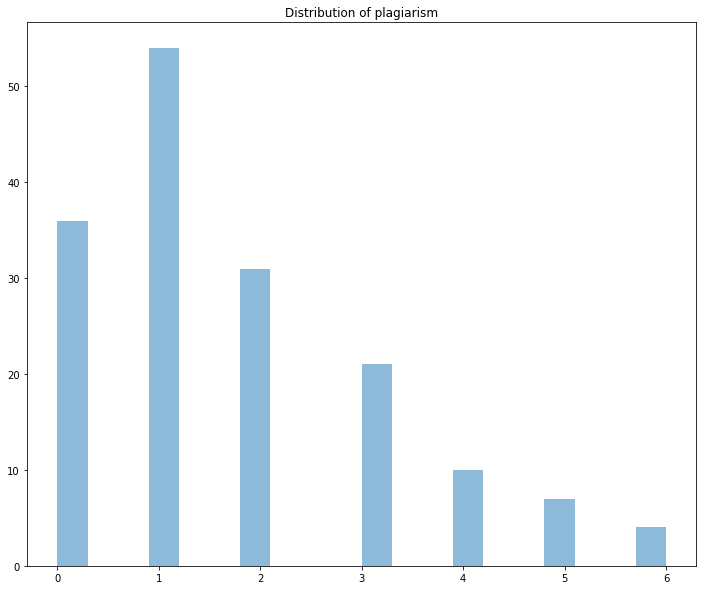

In [321]:
plt.figure(figsize=(12,10))
plt.hist(main['cheat'], bins=20, alpha=0.5)
plt.title('Distribution of plagiarism');

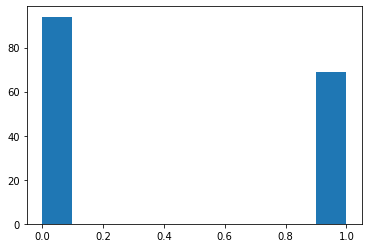

In [322]:
plt.hist(main['sex']); 

In [323]:
main.to_csv('main_table_second.csv') 

In [325]:
from scipy import stats #понормируем

In [326]:
main['gpa'] = stats.zscore(main['gpa'])
main['cheat'] = stats.zscore(main['cheat'])
main['cheat_formal'] = stats.zscore(main['cheat_formal'])
main['cheat_informal'] = stats.zscore(main['cheat_informal'])
main['gpa_formal'] = stats.zscore(main['gpa_formal'])
main['gpa_informal'] = stats.zscore(main['gpa_informal'])

In [328]:
main.to_csv('main_table_second_norm.csv') 